# 5.1 Rating Scale Model (RSM)

As in the Rasch model, $θ_v$ denotes the person parameter
(the latent trait or ability being measured) and $β_i$ the item location
parameter (corresponding to item's difficulty), here again written as easiness
parameter in order to be consistent with the
specification used in the `eRm` package. Each category h gets a category parameter
ωh, constant across items. This means that item differences are solely reflected by
the shifts in $β_i$ across items. Belonging to the Rasch family, the RSM shares all the
desirable Rasch measurement properties. The downside is that the model is pretty
strict since the same assumptions need to be fulfilled as in the Rasch model.

## The dataset

To illustrate an RSM fit, we use data analyzed in Bond and Fox (2015). The
Children’s Empathic Attitudes Questionnaire (CEAQ; Funk et al., 2008) is a 16-
item scale to measure empathy of late elementary and middle school-aged children.
Each item has three ordered responses: “no” (1), “maybe” (2), and “yes” (3). The
sample size is n = 208. Three covariates (age, gender, grade) were collected as
well. Let us extract the items and set the lowest category to 0 in order to make it
`eRm` compatible ().

## Load, prepare and inspect the dataset

In [2]:
# Imports
import numpy as np
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Miscellaneous
pandas2ri.activate()
numpy2ri.activate()
ro.r('set.seed(123)')
%load_ext rpy2.ipython

# R imports
importr('base')
importr('mirt')      # Quick fix if future (mirt dependency) is not installed automatically: ro.r('install.packages("future", repos="https://cloud.r-project.org")')
importr('MPsychoR')
importr('Gifi')
importr('psych')
importr('stats')
importr('eRm')
importr('ltm')

c:\Users\maku1542\AppData\Local\miniconda3\envs\psy126\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


rpy2.robjects.packages.Package as a <module 'ltm'>

In [3]:
# Load the data in R
ro.r("data(CEAQ)")

# Get as DataFrame
CEAQ = pandas2ri.rpy2py(ro.globalenv['CEAQ'])

# Subtract 1 from every response to make the dataset eRm compatible
itceaq = CEAQ.iloc[:, :16] - 1

# Inspect the dataset
itceaq.head()


,ceaq1,ceaq2,ceaq3,ceaq4,ceaq5,ceaq6,ceaq7,ceaq8,ceaq9,ceaq10,ceaq11,ceaq12,ceaq13,ceaq14,ceaq15,ceaq16
1,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
2,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0
3,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0
5,2.0,1.0,2.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0


### Fit the model


When evaluating item fit in polytomous Rasch-family models such as the **Rating Scale Model (RSM)**, it is necessary to compute person parameters using the `person.parameter()` function before calling `itemfit()`. This is a crucial step because the `itemfit()` function assesses item-level model fit by comparing the **observed** item responses to their **expected** values under the model. 

These expectations are calculated with respect to each individual's **latent trait level (θ)**—which is not known in advance but must be estimated. The `person.parameter()` function takes the fitted model object (e.g., from `RSM()`) and computes these ability estimates for each respondent, taking into account the structure of the RSM, where all items share the same set of step parameters.

Once these person parameters are estimated, they can be used to evaluate how well each item conforms to the expectations of the Rating Scale Model. This includes residual-based statistics like infit and outfit mean squares. Without the `person.parameter()` object, `itemfit()` lacks the necessary trait estimates to perform its computations.


In [4]:
# Put data back into R
ro.globalenv['itceaq'] = itceaq

# Fit the model and get person parameters in R
ro.r("""
fitrsm <- RSM(itceaq)
ppar2 <- person.parameter(fitrsm)
ifit0 <- eRm::itemfit(ppar2)
""")
ifit0 = ro.r("ifit0")
print(ifit0)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  210.938 205   0.373      1.024     0.918    0.201  -0.704   0.504
ceaq2  190.205 205   0.763      0.923     0.897   -0.496  -0.977   0.549
ceaq3  259.718 205   0.006      1.261     0.966    1.305  -0.215   0.396
ceaq4  222.146 205   0.196      1.078     0.995    0.724  -0.024   0.289
ceaq5  167.622 205   0.974      0.814     0.864   -1.576  -1.471   0.511
ceaq6  191.085 205   0.749      0.928     0.914   -0.764  -1.055   0.407
ceaq7  162.424 205   0.987      0.788     0.886   -1.506  -1.074   0.588
ceaq8  146.463 205   0.999      0.711     0.738   -3.409  -3.523   0.622
ceaq9  181.586 205   0.879      0.881     0.891   -1.311  -1.373   0.512
ceaq10 380.868 205   0.000      1.849     1.650    3.959   4.549  -0.044
ceaq11 149.579 205   0.999      0.726     0.753   -3.297  -3.342   0.635
ceaq12 192.132 205   0.731      0.933     0.980   -0.424  -0.151   0.589
ceaq13 188.073 205   0.796   


The output above presents item-level fit statistics from a Rating Scale Model (RSM). Each row corresponds to an item, and the columns report several indicators of model-data fit. Since the degrees of freedom (*df*) are constant across items (df = 205), the chi-square (*χ²*) p-values are directly comparable. However, it is important to note that chi-square statistics are sensitive to sample size and often exhibit **inflated Type I error rates**. This can lead to **false positives**—that is, the incorrect identification of misfitting items.

More reliable indicators of item fit in practice are the **mean square (MSQ)** statistics:

- **Outfit MSQ**: Measures unexpected responses, especially those that are far from a person’s estimated ability. It is sensitive to outliers.
- **Infit MSQ**: Focuses on unexpected responses near a person’s ability level and is more robust to outliers. Therefore, infit is often preferred.

Both fit indices should ideally fall within the range of **[0.7, 1.3]**. Values:
- **Below 0.7** suggest overfit (i.e., responses are too predictable),
- **Above 1.3** suggest underfit (i.e., noise or unexplained variance in responses).

Additionally, **standardized t-values** are provided for both outfit and infit. These values convert the MSQ statistics into approximate z-scores and should ideally lie within the range of **[−2, 2]**.

**Note**: The `Discrim` values in the output are post hoc diagnostic indicators of item–trait alignment and do not reflect freely estimated discrimination parameters, as discrimination is fixed in the RSM.

---

### Evaluating Misfitting Items

From the table above:

- **Item 10 (`ceaq10`)** shows strong evidence of misfit:  
  - χ² p-value = 0.000 (significant),
  - Outfit MSQ = 1.849 and Infit MSQ = 1.650 (both well above the acceptable range),
  - t-values for both infit and outfit exceed 3.9,
  - Discrimination is negative (−0.044), suggesting it may be performing poorly overall.

- **Item 3 (`ceaq3`)** and **Item 15 (`ceaq15`)** also raise concerns:  
  - `ceaq3` has a significant p-value (0.006), with outfit MSQ = 1.261 and t = 1.305,
  - `ceaq15` has p = 0.018, infit MSQ = 1.166, and t-values nearing ±2.

- **Items 8 and 11 (`ceaq8`, `ceaq11`)** exhibit very low MSQ values and t-values below −3, suggesting **overfit**. While overfit is less problematic than underfit, it may indicate overly constrained response behavior.

Overall, **Items 10, 3, 15, 8, and 11** warrant closer inspection. They may require revision or removal depending on substantive considerations and further psychometric evaluation.

For now, let us eliminate item 10 and item 15 and refit the model:


In [5]:
# Subset the dataset to remove items 10 and 15
itceaqsub = itceaq.drop(itceaq.columns[[9,14]], axis=1)

# Put data back into R
ro.globalenv['itceaqsub'] = itceaqsub

# Fit the model
ro.r("fitrsm2 <- RSM(itceaqsub)")

# Get person parameters
ppar2 = ro.r("ppar2 <- person.parameter(fitrsm2)")

# Get item fit
ifit02 = ro.r("eRm::itemfit(ppar2)")
print(ifit02)


Itemfit Statistics: 
         Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
ceaq1  225.051 205   0.161      1.092     0.979    0.583  -0.143   0.495
ceaq2  207.044 205   0.447      1.005     0.937    0.084  -0.566   0.553
ceaq3  266.737 205   0.002      1.295     1.018    1.362   0.183   0.412
ceaq4  261.178 205   0.005      1.268     1.111    2.166   1.200   0.273
ceaq5  181.898 205   0.876      0.883     0.938   -0.904  -0.617   0.501
ceaq6  205.813 205   0.471      0.999     0.971    0.024  -0.320   0.408
ceaq7  164.570 205   0.983      0.799     0.922   -1.345  -0.705   0.593
ceaq8  148.237 205   0.999      0.720     0.763   -3.126  -3.044   0.623
ceaq9  188.180 205   0.794      0.913     0.936   -0.871  -0.763   0.508
ceaq11 156.431 205   0.995      0.759     0.792   -2.679  -2.683   0.621
ceaq12 193.162 205   0.713      0.938     0.983   -0.363  -0.126   0.611
ceaq13 185.197 205   0.836      0.899     0.931   -0.956  -0.806   0.526
ceaq14 252.851 205   0.013   


In this updated model run, no items exhibit the same combination of significant p-values *and* extreme misfit statistics observed previously (e.g., item 10). However, **items 3, 4, and 14** still present **significant chi-square p-values** (p < 0.05), which could indicate **potential misfit** with respect to the assumptions of the RSM.

This misfit could suggest that these items are **not functioning uniformly** across all levels of the latent trait—possibly measuring a slightly different or additional construct. However, this interpretation must be tempered by examining other fit statistics.

Notably:
- The **Infit and Outfit MSQ values** for these items remain within the acceptable range of **[0.7, 1.3]**.
- The **standardized t-values** also remain largely within the recommended bounds of **[−2, 2]**, except for item 4’s infit t (2.087), which marginally exceeds this range.
- The **Discrimination indices** for all three items remain positive and comparable to other items, suggesting they still contribute to differentiating respondents along the latent trait.

Taken together, while the chi-square statistics alone flag these items, the absence of corroborating misfit in the more robust indicators (infit/outfit MSQ and t-values) suggests that **these items may still be retained**. This reflects a common psychometric judgment: significant p-values in isolation—especially when multiple comparisons are made—do not necessarily indicate problematic items, particularly when other indices support acceptable fit.

Thus, we recommend **including items 3, 4, and 14**, with a note for future validation studies to monitor their performance.


## Andersen’s LRtest()

Let us double-check the model fit using **Andersen’s LR-test**, which has better
inferential properties than the itemfit statistics. It's a statistical test
that assesses whether the item parameters are consistent across different groups
of respondents (in this case, we use grade as splitting criterion).

Note that we have some missing grade and gender values, for simplicity we will discard every participant that has missing values. We will also reinitialize our variable to make sure we are working with the updated dataset from now on.

In [6]:
# Discard all participatns with missing data 
CEAQ = CEAQ.replace(-2147483648, np.nan)      # Replace -2147483648 with NaN
CEAQ = CEAQ.dropna()                          # Drop rows with NaN values
itceaq = CEAQ.iloc[:, :16] - 1                # Subtract 1 from every response to make the dataset eRm compatible
itceaqsub = itceaq.drop(itceaq.columns[[9,14]], axis=1) # Drop items 10 and 15

# Put data back into R
ro.globalenv['CEAQ'] = CEAQ              
ro.globalenv['itceaq'] = itceaq          
ro.globalenv['itceaqsub'] = itceaqsub    

In [7]:
gradevec = pd.Categorical(CEAQ['grade'])      # Convert 'grade' column to categorical
print(gradevec)

[3.0, 1.0, 3.0, 3.0, 3.0, ..., 2.0, 2.0, 3.0, 3.0, 2.0]
Length: 187
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]


With the next code we binarize `gradevec` and compute the LR-test using the `LRtest()` function. The following code chunk is creating two groups (grades 1-2 and grades 3-4) to compare item parameters between these *two* groups.

---
<details>
<summary> Alternative: Using vanilla python </summary>

Alternatively you can simply loop through the items of gradevec and assign either `grade12` or `grade34` without needing to use any pandas function, see the following:


```python
# Using the for loop
gradevec_bin = []
for i, g in enumerate(gradevec):
    if gradevec[i] in [1.0, 2.0]:
        gradevec_bin.append('grade12')
    else:
        gradevec_bin.append('grade34')

```


Using *line comprenhension* for a more sleek look:
```python
# Line Comprehension
gradevec_bin = ['grade12' if g in [1.0, 2.0] else 'grade34' for g in gradevec]
gradevec_bin = pd.Categorical(gradevec_bin)  # Don't forget to turn gradevec_bin into a categorical variable
```
</details> 

---

In [8]:
# Binarize the 'grade' vector
gradevec_bin = gradevec.map({1.0: 'grade12', 2.0: 'grade12', 3.0: 'grade34', 4.0: 'grade34'})
gradevec_bin = pd.Categorical(gradevec_bin, categories=['grade12', 'grade34'])
print(gradevec_bin)

['grade34', 'grade12', 'grade34', 'grade34', 'grade34', ..., 'grade12', 'grade12', 'grade34', 'grade34', 'grade12']
Length: 187
Categories (2, object): ['grade12', 'grade34']


C:\Users\maku1542\AppData\Local\Temp\ipykernel_18564\1239552924.py:2: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  gradevec_bin = gradevec.map({1.0: 'grade12', 2.0: 'grade12', 3.0: 'grade34', 4.0: 'grade34'})


In [9]:
# Put clean data back into R
ro.globalenv['CEAQ'] = CEAQ                   
ro.globalenv['gradevec'] = gradevec_bin       

# Fit the model again on the new cleaned data in R
ro.r("""
fitrsm2 <- RSM(itceaqsub)
ppar2 <- person.parameter(fitrsm2)
""")

LRtest1 = ro.r("LRtest(fitrsm2, gradevec)")
print(LRtest1)


Andersen LR-test: 
LR-value: 15.848 
Chi-square df: 14 
p-value:  0.323 




### Interpretation
**Chi-square test decision rule**:
- Null hypothesis (H₀): Item parameters are invariant across groups (Rasch model holds).

- Alternative hypothesis (H₁): Item parameters differ across groups (Rasch model does not hold).

Since the `p-value: 0.323` is greater than the conventional alpha level (e.g., 0.05), we fail to reject the null hypothesis.



## WaldTest()

An alternative method for evaluating item-category fit is the `Waldtest()` function, 
which provides a *p-value* for each **threshold** (item-category) parameter.
Interpreting results where some parameters for an item are significant while others are not can be nuanced. 
Whether to retain or remove such items depends on the desired strictness of model fit and the flexibility in item selection for scale construction.

As a general *rule of thumb*, significant *p-values* suggest that certain item-category thresholds deviate meaningfully from the average, 
indicating that the RSM's assumption of uniform category thresholds may not fully hold.


In [10]:
fitWald = ro.r("Waldtest(fitrsm2, gradevec)")
print(fitWald)


Wald test on item level (z-values):

               z-statistic p-value
beta ceaq1.c1        0.486   0.627
beta ceaq1.c2       -0.012   0.991
beta ceaq2.c1       -0.013   0.989
beta ceaq2.c2       -0.523   0.601
beta ceaq3.c1       -0.410   0.682
beta ceaq3.c2       -0.862   0.389
beta ceaq4.c1       -1.275   0.202
beta ceaq4.c2       -1.707   0.088
beta ceaq5.c1        0.112   0.911
beta ceaq5.c2       -0.426   0.670
beta ceaq6.c1       -2.044   0.041
beta ceaq6.c2       -2.183   0.029
beta ceaq7.c1        0.269   0.788
beta ceaq7.c2       -0.257   0.797
beta ceaq8.c1       -1.117   0.264
beta ceaq8.c2       -1.501   0.133
beta ceaq9.c1       -0.681   0.496
beta ceaq9.c2       -1.063   0.288
beta ceaq11.c1       1.043   0.297
beta ceaq11.c2       0.348   0.728
beta ceaq12.c1       2.646   0.008
beta ceaq12.c2       2.075   0.038
beta ceaq13.c1       0.161   0.872
beta ceaq13.c2      -0.355   0.723
beta ceaq14.c1       0.454   0.650
beta ceaq14.c2       0.005   0.996
beta ceaq16.c1   

Still, the overall fit of the model and the other item fit statistics indicate that the RSM is still a reasonable model given the data at hand.

## Inspect and interpret item paramters

In [75]:
fitrsm2 = ro.globalenv["fitrsm2"]
print(fitrsm2)                    # alternatively, you can use `ro.r("summary(fitrsm2)")` to get a summary of the model fit


Results of RSM estimation: 

Call:  RSM(X = itceaqsub) 

Conditional log-likelihood: -1565.379 
Number of iterations: 19 
Number of parameters: 14 

Item (Category) Difficulty Parameters (eta):
              ceaq2      ceaq3     ceaq4      ceaq5     ceaq6      ceaq7
Estimate -0.6863777 -1.2712365 0.0155642 -0.3647469 1.3268268 -0.6065978
Std.Err   0.1379881  0.1606748 0.1209737  0.1288561 0.1181625  0.1355097
             ceaq8     ceaq9    ceaq11     ceaq12    ceaq13     ceaq14
Estimate 0.6347949 1.3268268 0.9692035 -0.7273839 1.5426362 -1.2988594
Std.Err  0.1149212 0.1181625 0.1151861  0.1393175 0.1212466  0.1619545
             ceaq16     Cat 2
Estimate 0.06187617 1.5198971
Std.Err  0.12022888 0.1138046





In this example, let us proceed with the `fitrsm2` model. The item parameters
shown in the print or summary output are difficult to interpret. Let us convert
them into **threshold** parameters. \
The **threshold** parameters are more intuitive because they represent the points on the latent trait scale where the probability of responding in a higher category exceeds the probability of responding in a lower category.

In [ ]:
thpar = ro.r("thresholds(fitrsm2)")
print(thpar)


Design Matrix Block 1:
       Location Threshold 1 Threshold 2
ceaq1  -0.16252    -0.89441     0.56937
ceaq2   0.07934    -0.65255     0.81122
ceaq3  -0.58160    -1.31348     0.15029
ceaq4   0.73797     0.00608     1.46986
ceaq5   0.46689    -0.26500     1.19878
ceaq6   2.04031     1.30842     2.77219
ceaq7   0.04391    -0.68798     0.77579
ceaq8   1.38216     0.65027     2.11405
ceaq9   1.92245     1.19056     2.65434
ceaq11  1.71188     0.97999     2.44377
ceaq12  0.06169    -0.67020     0.79358
ceaq13  2.26829     1.53640     3.00018
ceaq14 -0.39327    -1.12516     0.33862
ceaq16  0.66895    -0.06294     1.40084




### Interpreting Parameters in Polytomous Rasch Models

In polytomous Rasch models, each item is associated with a **location parameter** and *k − 1* **threshold parameters**, where *k* is the number of response categories for that item. The **location parameter** reflects the overall difficulty or position of the item on the latent trait continuum (e.g., empathy). In contrast, the **threshold parameters** correspond to specific points along the trait continuum at which a respondent is equally likely to choose between two adjacent categories. For instance, the first threshold marks the point at which a respondent transitions from scoring 0 to scoring 1, the second from 1 to 2 (and so on if we had more than three categories).

While the location parameter summarizes the item’s general difficulty, the threshold parameters capture the relative difficulty of progressing between adjacent response categories.

Visualizing these dynamics is possible using the `plotICC()` function, which generates **Item Category Characteristic Curves**. For polytomous items, each curve represents the probability of endorsing a particular category as a function of the respondent's position on the latent trait. Let us illustrate this by plotting the ICC for the first item.


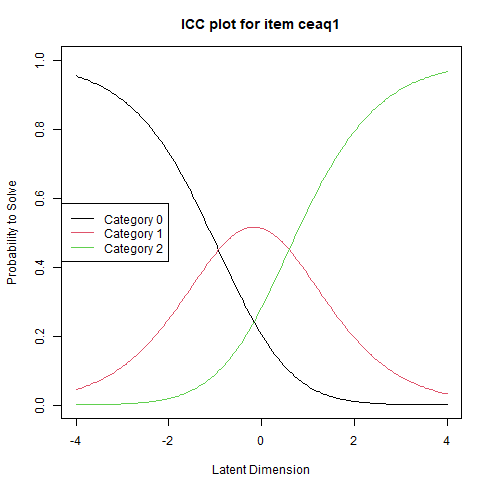

In [76]:
%%R
plotICC(fitrsm2, item.subset = 1)

Another plotting option, which summarizes nicely the entire set of parameter
estimates, is the person-item map.

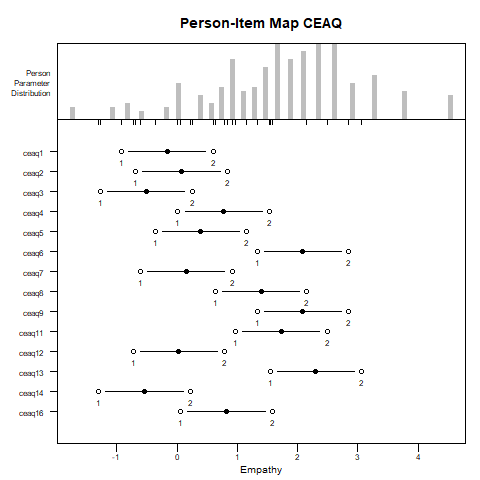

In [77]:
%%R
plotPImap(fitrsm2, latdim = "Empathy", main = "Person-Item Map CEAQ")

As this plot nicely illustrates, item differences occur due to location shifts only.
That is, we fit one set of threshold parameters for all items, which is then shifted
across the items via the location parameter. This means that RSM assumes  the relative distances between the response categories to be the same for all items, which is a strong assumption that might not always hold in practice.
This is a main feature of the RSM and will be relaxed in the next section.

### Test your understanding

- Based on the thpar output, which item appears to be the easiest? Which appears to be the most difficult? Discuss with your collegues.
- Looking at the person-item map, are there any respondents who seem to have very high or very low levels of empathy? How can you tell?